# Assignment 1: Data Parsing, Cleansing and Integration
## Task 1 and 2
#### Student Name: Hongjie Xu
#### Student ID: s3880497

Date: 31/08/2021

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used: please include the main libraries you used in your assignment, e.g.,:
* pandas
* re
* numpy
* difflib
* matplotlib
* datetime
* xml.etree.ElementTree


## Introduction

In this assignment, the main task is parsing data and cleaning data to required format.

- Read strctured data into required dataformat, such as from xml file to dataframe, is the most important thing in this assignment.

Then main task is cleaning data column by column, identify errors, fix errors and record errors.

- In all columns, existing missing or null value is the most commmon problem. Especially, missing value has many different values, such as `-`, ` `, `-`, `N/A`, `nan`
- In columns with string value, we may have misspelling issues, difflib is a good package to handle that.
- In columns with float value, we may have extra different methods to handle missing value, such as replacing with mean or median, building a predictio model, etc.
- In columns with data, validation check is important and easy to be checked.

Also, in all data, proper sanity check can find some potential errors.  😉 

Overall, Task1&Task2 in this assignment really needs diligent attention to details because some errors hide in somewhere not easy to be found.

## Importing libraries 

In [1]:
# Code to import libraries as you need in this assessment, e.g.,
import xml.etree.ElementTree as etree
import pandas as pd
from itertools import chain
import re
import difflib
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## Task 1. Parsing Data

### 1.1. Examining and loading data
Examine "\<student\_id\>_dataset1.xml" to determine its content and structure, then load it into Python.

In [2]:
# Load data into Python
tree = etree.parse("./S3880497_dataset1.xml")

The XML file is saved as a tree-based. It has nested structures, an item is a child of items.

In [3]:
# Get root elements
root = tree.getroot()
root

<Element 'JobAds' at 0x0000021B85F3E9F8>

In [4]:
# Get root name and numbers of children of the root element
print("Root Name is: ", root.tag)
print("Numbers of children of root: ", len(root))

Root Name is:  JobAds
Numbers of children of root:  107


In [91]:
# Lets say what is child under root
for child in root:
    print(child)

<Element 'Source' at 0x0000021B85F3EA48>
<Element 'Source' at 0x0000021B86047F98>
<Element 'Source' at 0x0000021B86DB0278>
<Element 'Source' at 0x0000021B871144A8>
<Element 'Source' at 0x0000021B872DB4F8>
<Element 'Source' at 0x0000021B873DFE58>
<Element 'Source' at 0x0000021B87547908>
<Element 'Source' at 0x0000021B87A98728>
<Element 'Source' at 0x0000021B87AACC78>
<Element 'Source' at 0x0000021B88714AE8>
<Element 'Source' at 0x0000021B88B31A98>
<Element 'Source' at 0x0000021B8902E778>
<Element 'Source' at 0x0000021B894C6098>
<Element 'Source' at 0x0000021B895D6BD8>
<Element 'Source' at 0x0000021B89615E58>
<Element 'Source' at 0x0000021B896D2BD8>
<Element 'Source' at 0x0000021B89A09EF8>
<Element 'Source' at 0x0000021B89A9DDB8>
<Element 'Source' at 0x0000021B89D40B88>
<Element 'Source' at 0x0000021B89D8F818>
<Element 'Source' at 0x0000021B89DCD4F8>
<Element 'Source' at 0x0000021B89E6D818>
<Element 'Source' at 0x0000021B8A06CBD8>
<Element 'Source' at 0x0000021B8A218688>
<Element 'Source

In [117]:
# Let say what is child under Source?


for child in root:    # child under source
    for child2 in child: # grandchild under child
        print(child)
        print(child2.attrib)
        for child3 in child2: # grand-grand child under child
            print(child3)
    break


<Element 'Source' at 0x0000021B85F3EA48>
{}
<Element 'Source' at 0x0000021B85F3EA48>
{'OpenDate': '20120724T000000', 'CloseDate': '20120823T000000'}
<Element 'Id' at 0x0000021B85F3EB88>
<Element 'Title' at 0x0000021B85F3EBD8>
<Element 'Location' at 0x0000021B85F3EC78>
<Element 'Company' at 0x0000021B85F3ECC8>
<Element 'ContractType' at 0x0000021B85F3ED68>
<Element 'ContractTime' at 0x0000021B85F3EDB8>
<Element 'Category' at 0x0000021B85F3EE08>
<Element 'Salary' at 0x0000021B85F3EE58>
<Element 'Source' at 0x0000021B85F3EA48>
{'OpenDate': '20130108T150000', 'CloseDate': '20130207T150000'}
<Element 'Id' at 0x0000021B85F3EEF8>
<Element 'Title' at 0x0000021B85F3EF48>
<Element 'Location' at 0x0000021B85F48048>
<Element 'Company' at 0x0000021B85F48098>
<Element 'ContractType' at 0x0000021B85F480E8>
<Element 'ContractTime' at 0x0000021B85F48138>
<Element 'Category' at 0x0000021B85F48188>
<Element 'Salary' at 0x0000021B85F48228>
<Element 'Source' at 0x0000021B85F3EA48>
{'OpenDate': '20130613T12

<Element 'Salary' at 0x0000021B85FAE048>
<Element 'Source' at 0x0000021B85F3EA48>
{'OpenDate': '20120203T000000', 'CloseDate': '20120403T000000'}
<Element 'Id' at 0x0000021B85FAE138>
<Element 'Title' at 0x0000021B85FAE188>
<Element 'Location' at 0x0000021B85FAE228>
<Element 'Company' at 0x0000021B85FAE278>
<Element 'ContractType' at 0x0000021B85FAE2C8>
<Element 'ContractTime' at 0x0000021B85FAE318>
<Element 'Category' at 0x0000021B85FAE368>
<Element 'Salary' at 0x0000021B85FAE3B8>
<Element 'Source' at 0x0000021B85F3EA48>
{'OpenDate': '20120904T150000', 'CloseDate': '20121004T150000'}
<Element 'Id' at 0x0000021B85FAE4A8>
<Element 'Title' at 0x0000021B85FAE4F8>
<Element 'Location' at 0x0000021B85FAE548>
<Element 'Company' at 0x0000021B85FAE598>
<Element 'ContractType' at 0x0000021B85FAE638>
<Element 'ContractTime' at 0x0000021B85FAE688>
<Element 'Category' at 0x0000021B85FAE6D8>
<Element 'Salary' at 0x0000021B85FAE728>
<Element 'Source' at 0x0000021B85F3EA48>
{'OpenDate': '20120801T15000

<Element 'Salary' at 0x0000021B8601D4A8>
<Element 'Source' at 0x0000021B85F3EA48>
{'OpenDate': '20130621T120000', 'CloseDate': '20130705T120000'}
<Element 'Id' at 0x0000021B8601D598>
<Element 'Title' at 0x0000021B8601D5E8>
<Element 'Location' at 0x0000021B8601D688>
<Element 'Company' at 0x0000021B8601D6D8>
<Element 'ContractType' at 0x0000021B8601D778>
<Element 'ContractTime' at 0x0000021B8601D7C8>
<Element 'Category' at 0x0000021B8601D818>
<Element 'Salary' at 0x0000021B8601D8B8>
<Element 'Source' at 0x0000021B85F3EA48>
{'OpenDate': '20120316T150000', 'CloseDate': '20120330T150000'}
<Element 'Id' at 0x0000021B8601D9A8>
<Element 'Title' at 0x0000021B8601D9F8>
<Element 'Location' at 0x0000021B8601DA98>
<Element 'Company' at 0x0000021B8601DAE8>
<Element 'ContractType' at 0x0000021B8601DB38>
<Element 'ContractTime' at 0x0000021B8601DB88>
<Element 'Category' at 0x0000021B8601DBD8>
<Element 'Salary' at 0x0000021B8601DC28>
<Element 'Source' at 0x0000021B85F3EA48>
{'OpenDate': '20130724T00000

In [5]:
# all possible attributes under root
set(elem.tag for elem in tree.iter())

{'Ad',
 'Category',
 'Company',
 'ContractTime',
 'ContractType',
 'Id',
 'JobAds',
 'Location',
 'Salary',
 'Source',
 'SourceName',
 'Title'}

In [7]:
print(len(root.findall('.//Id')))
print(len(root.findall('.//Title')))
print(len(root.findall('.//Location')))
print(len(root.findall('.//Company')))
print(len(root.findall('.//ContractType')))
print(len(root.findall('.//ContractTime')))
print(len(root.findall('.//Category')))
print(len(root.findall('.//Salary')))

50703
50703
50703
49647
39352
46286
50703
49942


From above, we can have many information about this XML file.


- Its root is called JobAds, which is a root tag. 

- One thing called Source under root.  

- Each source has one SourceName and many Ads

- Ad has attributes called OpenDate & CloseDate, Ad has many child as well.

- Some information is originally missing in the XML file, we need to add empty attributes or tag to it.

### 1.2 Parsing data into the required format

Regarding the structure we learnt from above section, we can get data from this XML file.

In [8]:
# Code to parse data
'''
Generally, Traverse each source and Traverse each SoureName under each source, then Traverse each jobAd under each ad;
Ad has its own attribs, opendate & closedate
Ad has its tags, company, contractType, contracttime, etc.
'''
all_ads_list = []
for source in root.findall('./'):   # look at each source under root
    for name in source.iter(tag='SourceName'): # look at SourceName under source
        for ad in source.iter(tag='Ad'): # look at ad under source
            dict_1 = {}
            for i in ad:  # look at information under ad
                dict_1[i.tag] = i.text
            dict_1['OpenDate'] = ad.attrib['OpenDate']
            dict_1['CloseDate'] = ad.attrib['CloseDate']
            dict_1['SourceName'] = name.text
            all_ads_list.append(dict_1)

In [9]:
#fill those missing tabs with required value
for ad in all_ads_list:
    if 'ContractType' not in ad.keys():
        ad['ContractType']='non-specified'
    elif 'Salary' not in ad.keys():
        ad['Salary']=0
    elif 'Category' not in ad.keys():
        ad['Category']='non-specified'
    elif 'Company' not in ad.keys():
        ad['Company']='non-specified'
    elif 'ContractTime' not in ad.keys():
        ad['ContractTime']='non-specified'

In [10]:
# Create a DataFrame object from the dictionary generated from XML
job_df = pd.DataFrame(all_ads_list)
job_df

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,68187214,SQL DBA Team Lead,The City,Computer Futures,N/A,N/A,IT Jobs,55000,20120724T000000,20120823T000000,gojobsearch.co.uk
1,70099658,RGN Chiswick ****,UK,Prospect Health,N/A,N/A,Healthcare & Nursing Jobs,22912,20130108T150000,20130207T150000,gojobsearch.co.uk
2,67322981,Senior Performance Engineer,UK,ARM,N/A,N/A,IT Jobs,55000,20130613T120000,20130812T120000,gojobsearch.co.uk
3,68372925,CFD Engineer Job based in Warwickshire,Rugby,Clemtech,N/A,N/A,Engineering Jobs,42500,20120804T000000,20120903T000000,gojobsearch.co.uk
4,71900386,Electromechanical Machinery Project Engineer,East Sussex,Redline Group,N/A,N/A,Engineering Jobs,40000,20120904T150000,20120918T150000,gojobsearch.co.uk
...,...,...,...,...,...,...,...,...,...,...,...
50698,70139229,Health & Social Care Tutor/Assessor Bristol,UK,Pursuit Training Ltd,non-specified,permanent,Teaching Jobs,18000,20120811T000000,20121010T000000,cvjobstore.com
50699,68704692,Graduate SoftwareWeb Developer,London,UNKNOWN auto added by vacany import,N/A,N/A,IT Jobs,N/A,20120112T120000,20120312T120000,grb.uk.com
50700,66928165,MOD GP Locum – Berkshire,Berkshire,Your World Healthcare UK,part_time,contract,Healthcare & Nursing Jobs,59040,20120625T150000,20120725T150000,jobs.gponline.com
50701,71478475,"Salaried GP in Leicester, FullTime or PartTime...",Leicester,Global Medics Permanent UK,full_time,permanent,Healthcare & Nursing Jobs,47500,20130316T000000,20130614T000000,jobs.gponline.com


## Task 2. Auditing and cleansing the loaded data


### General Audit

In [11]:
# Show basic infor about created DataFrame
job_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50703 entries, 0 to 50702
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            50703 non-null  object
 1   Title         50703 non-null  object
 2   Location      50703 non-null  object
 3   Company       50102 non-null  object
 4   ContractType  50703 non-null  object
 5   ContractTime  48024 non-null  object
 6   Category      50703 non-null  object
 7   Salary        50196 non-null  object
 8   OpenDate      50703 non-null  object
 9   CloseDate     50703 non-null  object
 10  SourceName    50703 non-null  object
dtypes: object(11)
memory usage: 4.3+ MB


In [12]:
job_df.isnull().sum()

Id                 0
Title              0
Location           0
Company          601
ContractType       0
ContractTime    2679
Category           0
Salary           507
OpenDate           0
CloseDate          0
SourceName         0
dtype: int64

From above lists, it can be found:

`Company`, `ContractTime`, `Salary` have missing value as nan.

`OpenDate`,`CloseDate`,`Salary` have wrong column datatype.


The cleanning steps are based on column by column

### Id

In [13]:
# Check length of Id
len(job_df.Id)

50703

In [14]:
# Check whether there is NaN in Id column
job_df[job_df.Id.isna()]

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName


In [15]:
# Check id,  8 digit id
for jobid in job_df.Id:
    if not re.match(r'\d{8}', jobid):
        print(jobid)

In [16]:
# Check wheather duplicated id exists, no duplicated ID found
job_df['Id'][job_df['Id'].duplicated()]

Series([], Name: Id, dtype: object)

In [17]:
# Change column datatype to Integer
job_df['Id']=job_df['Id'].astype(int)

### Title

In [18]:
# Check length of title
len(job_df.Title)

50703

In [19]:
# Check value in title
job_df.Title.value_counts()

SQL Database Administrator  Developer                           2
Recruitment Account Manager  Digital Media                      2
Internal Auditor/General Auditor                                2
Senior Staff Nurse  Oxford                                      1
Financial Analyst  Production                                   1
                                                               ..
SAP PS / Project Systems Business Analyst                       1
SAP Business One Support Consultant or Superuser  SAP B1        1
Credit Controller  Crewe                                        1
Accounts Manager (Part  Time)                                   1
Commercial Property Casualty Underwriter, (Manchester)  ****    1
Name: Title, Length: 50700, dtype: int64

In this section, one missing value has been idenfied from title. job_df has been updated. Error_list created

### Location

In [20]:
# Check value in location column
job_df.Location.str.lower().value_counts()

uk                   7623
london               6611
south east london    2687
the city             1129
central london        830
                     ... 
livepool                2
oxfords                 2
cembridge               2
leads                   1
manchaster              1
Name: Location, Length: 484, dtype: int64

Looks like those low frequency values have missspelling issues.

In [21]:
# change all spelling into lowercase
job_df.Location = job_df.Location.str.lower()

In [22]:
# Using difflib package to identify correct spellings
def checkspellings(df, column, wrong_spelling):
    '''
    df:     dataframe,              pandas DataFrame datatype
    column: column to check         string
    wrong_spelling: wrong_spelling  string
    '''   
    correct_spelling = difflib.get_close_matches(wrong_spelling,set(df[column]).difference([wrong_spelling]), n = 1,cutoff=0.8)
    return correct_spelling[0]

# Create a correction vocabulary dict
error_spelling_dict = {'manchaster':'', 'leads':'', 'oxfords':'', 'livepool':'', 'cembridge':''}

# fill correct spellings in vocabulary dict
for key, value in error_spelling_dict.items():
    correct_spelling = checkspellings(job_df, 'Location', key)
    error_spelling_dict[key] = correct_spelling

# a spelling dictionary acquired
error_spelling_dict

{'manchaster': 'manchester',
 'leads': 'leeds',
 'oxfords': 'oxford',
 'livepool': 'liverpool',
 'cembridge': 'cambridge'}

In [23]:
# update the correct spelling into dataframe, record an error list as well 
def writing_error_list(df, column_name, replace_dict, error_type):
    '''
    df:                     dataframe, Pandas DataFrame type
    column_name:            Column name, string
    replace_dict:           A dict for correct spelling, dictionary
    error_type:             error type identified, string
    '''
    error_list=[]
    for key,value in replace_dict.items():
        for idx in df[df[column_name]==key].index:
            error_dict={}
            error_dict['indexOfdf']=idx
            error_dict['Id']=df.loc[idx, 'Id']
            error_dict['ColumnName']=column_name
            error_dict['Original']=key
            error_dict['Modified']=value
            error_dict['ErrorType']=error_type
            error_dict['Fixing']="Change " + "'"+key+"'" + " to " + "'"+value+"'"
            error_list.append(error_dict)
            df.loc[idx, 'Location']=value
    return df, error_list

job_df, error_list_loc = writing_error_list(job_df, 'Location', error_spelling_dict, 'Misspelling')

In [24]:
# double check again
job_df.Location.str.lower().value_counts()

uk                   7623
london               6611
south east london    2687
the city             1129
central london        830
                     ... 
thorpe st. andrew       9
chipping campden        8
petersfield             8
oldbury                 8
north finchley          7
Name: Location, Length: 479, dtype: int64

In this `Location` section, misspelling issues are identified, fixed and recorded

In [25]:
error_list_location = error_list_loc


### Company

In [26]:
# As we know there are NaN in column, check again
job_df[job_df.Company.isna()].head()

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
33202,71764176,Crane/Hoist Service Technician,rochester,NaN,full_time,NaN,Engineering Jobs,0,20130902T150000,20131201T150000,Jobcentre Plus
33231,66049382,BMS Project Engineer,north shields,NaN,full_time,NaN,Engineering Jobs,0,20130427T120000,20130527T120000,Jobcentre Plus
33250,69960879,Canvasser / External Sales,barnsley,NaN,full_time,NaN,Sales Jobs,0,20120602T150000,20120801T150000,Jobcentre Plus
33278,68237526,Senior Procurement Specialist,huddersfield,NaN,full_time,NaN,Accounting & Finance Jobs,0,20121024T000000,20121223T000000,Jobcentre Plus
33425,69554124,Trainee Recruitment Consultant No Experience N...,birmingham,NaN,full_time,NaN,Sales Jobs,0,20131019T120000,20140117T120000,Jobcentre Plus


In [27]:
# create a function, dealing NaN error, they are not string type, cannot be identified in regex
def writing_error_na_replace(df, column, replace_str, error_type):
    '''
    df:                           (DataFrame object)
    column:           column name (String)
    replace_str:                  (String)
    error_type:                   (String)
    '''
    error_list=[]
    for idx, item in df[df[column].isna()][column].items():
        df.loc[idx, column]=replace_str
        error_dict={}
        error_dict['indexOfdf']=idx
        error_dict['Id']=job_df.loc[idx, 'Id']
        error_dict['ColumnName']=column
        error_dict['Original']= np.nan
        error_dict['Modified']=replace_str
        error_dict['ErrorType']=error_type
        error_dict['Fixing']="Change " + str(np.nan)+  " to " +str(replace_str)
        error_list.append(error_dict)
    return df, error_list

# Update dataframe, record errors into a list
job_df, error_company_npnan = writing_error_na_replace(job_df, 'Company', 'non-specified', 'Missing Value')

In [28]:
# Check value in Company column
job_df.Company.value_counts()

N/A                   3293
non-specified         1056
                       829
UKStaffsearch          434
Randstad               368
                      ... 
Simply Angelic           1
Keele University         1
ROL Testing Ltd          1
NW Recruitment Ltd       1
HICA Group               1
Name: Company, Length: 8674, dtype: int64

From the above, N/A, missing empty string, etc can be idenfitied in Company column.

All identified missing values need to be replaced by "non-specified". A function can be built specially for these errors, specific error type, and replaced by fixed term. 

Except N/A shown in the list above, some other missing value also can be found here:
       they are : dash, fullstop, space and N/A

In [29]:
job_df[job_df['Company'].str.fullmatch(r'[^a-zA-Z0-9]*|N/A')]['Company'].value_counts()

N/A    3293
        829
-       153
.         1
Name: Company, dtype: int64

In [30]:
# create a function, which can find the error, remove the error or replace the specific string with another string  
def writing_error_replace(df, column, match_regex, remove_regex, replace_str, error_type):
    '''
    df:                           (DataFrame object)
    column:                       (String)
    match_regex:                  (regex string)    regex match error
    remove_regex:                 (regex string)    regex match string will be replaced
    replace_str:                  (String)          strings to be filled
    error_type:                   (String)
    '''

    error_list_remove=[]
    for idx, value in df[df[column].str.fullmatch(match_regex)][column].items():
        error_dict={}
        Original=value
        Modified=re.sub(remove_regex, replace_str, value)
        error_dict['indexOfdf']=idx
        error_dict['Id']=job_df.loc[idx, 'Id']
        error_dict['ColumnName']=column
        error_dict['Original']=Original
        error_dict['Modified']=Modified
        error_dict['ErrorType']=error_type
        error_dict['Fixing']="Change " + "'"+str(Original)+"'" + " to " + "'"+str(Modified)+"'"
        error_list_remove.append(error_dict)
        df.loc[idx, column]=Modified
    return df, error_list_remove

job_df, error_company_NA = writing_error_replace(job_df, "Company", r'N/A', 'N/A', 'non-specified', 'Missing Value')
job_df, error_company_space = writing_error_replace(job_df, "Company", r' ', ' ', 'non-specified', 'Missing Value')
job_df, error_company_dash = writing_error_replace(job_df, "Company", r'^-$', '-', 'non-specified', 'Missing Value')
job_df, error_company_fullstop = writing_error_replace(job_df, "Company", r'^.$', '.', 'non-specified', 'Missing Value')

In this `Company` section, bunch of missing value are identified, fixed and recorded.

In [31]:
error_list_company = error_company_npnan+error_company_NA+error_company_space+error_company_dash+error_company_fullstop

### ContractType

In [32]:
# As we know there is no nan in ContractType, but check again
job_df['ContractType'].isna().sum()

0

In [33]:
# Check values
job_df['ContractType'].value_counts()

full_time        11752
-                11406
non-specified    11351
N/A               9866
                  4813
part_time         1515
Name: ContractType, dtype: int64

We can still use the function we created when we was dealing Company column.

Match those missing value, replace them with empty then filling in the `non-specified`

In [34]:
# update, fix and record error
job_df, error_ContractType_NA = writing_error_replace(job_df, "ContractType", r'N/A', 'N/A', 'non-specified', 'Missing Value')
job_df, error_ContractType_nullstring = writing_error_replace(job_df, "ContractType", r' ', ' ', 'non-specified', 'Missing Value')
job_df, error_ContractType_dash = writing_error_replace(job_df, "ContractType", r'-', '-', 'non-specified', 'Missing Value')

In [35]:
# Check values again
job_df['ContractType'].value_counts()

non-specified    37436
full_time        11752
part_time         1515
Name: ContractType, dtype: int64

In this `ContractType` section, bunch of missing value are identified, fixed and recorded.

In [36]:
error_list_contracttype=error_ContractType_NA+error_ContractType_nullstring+error_ContractType_dash

### ContractTime

In [37]:
# Check numbers of ContractTime
len(job_df['ContractTime'])

50703

In [38]:
# as we knew, contracttime has nan value, check again
job_df['ContractTime'].isna().sum()

2679

In [39]:
# Check all possible value
job_df['ContractTime'].value_counts()

permanent        30324
N/A               6065
contract          5579
-                 3920
non-specified     1738
                   398
Name: ContractTime, dtype: int64

In [40]:
# Obviously, nan is not included above
job_df['ContractTime'].value_counts().sum()

48024

In [41]:
# update, fix, record nan first
job_df, error_ContractTime_npnan = writing_error_na_replace(job_df, 'ContractTime', 'non-specified', 'Missing Value')

Similar issues in ContractType, the function can be still used

In [42]:
# update, fix, record others missing value to required non-specified
job_df, error_ContractTime_NA = writing_error_replace(job_df, "ContractTime", r'N/A', 'N/A', 'non-specified', 'Missing Value')
job_df, error_ContractTime_nullstring = writing_error_replace(job_df, "ContractTime", r' ', ' ', 'non-specified', 'Missing Value')
job_df, error_ContractType_dash = writing_error_replace(job_df, "ContractTime", r'-', '-', 'non-specified', 'Missing Value')

In [43]:
# Double check value
job_df['ContractTime'].value_counts()

permanent        30324
non-specified    14800
contract          5579
Name: ContractTime, dtype: int64

In this `ContractTime` section, bunch of missing value are identified, fixed and recorded.

In [44]:
error_list_contracttime = error_ContractTime_npnan+error_ContractTime_NA+error_ContractTime_nullstring+error_ContractType_dash

### Category

Allowed values are ‘IT Jobs’, ‘Healthcare & Nursing Jobs’,
‘Engineering Jobs’, ‘Accounting & Finance Jobs’, ‘Sales Jobs’, ‘Hospitality & Catering
Jobs’, ‘Teaching Jobs’, ‘PR, Advertising & Marketing Jobs’.

In [45]:
# Check numbers of ContractTime
len(job_df['Category'])

50703

In [46]:
# Check numbers of ContractTime
job_df['Category'].value_counts()

IT Jobs                             13134
Healthcare & Nursing Jobs            8183
Engineering Jobs                     7200
Accounting & Finance Jobs            6802
Sales Jobs                           4744
Hospitality & Catering Jobs          4530
Teaching Jobs                        3558
PR, Advertising & Marketing Jobs     2552
Name: Category, dtype: int64

Looks like they are all correct. Check in details.

In [47]:
allowed_category_value=['IT Jobs', 'Healthcare & Nursing Jobs', 'Engineering Jobs', 'Accounting & Finance Jobs', 'Sales Jobs',
                       'Hospitality & Catering Jobs', 'Teaching Jobs', 'PR, Advertising & Marketing Jobs']
violated_list=[]
for idx, value in job_df['Category'].items():
    if value in allowed_category_value:
        continue
    else:
        violated_list.append(idx)
violated_list

[]

In this `Category` section, no violated or missing vlaue has been found.

### Salary

The possible issues in `Salary` have been defined as missing value (nan) from above simple check. 

However, in following steps, 
  Irrgrularities, more missing values are identified

In [48]:
# check datatype 
job_df['Salary'].dtype

dtype('O')

In [49]:
# Find all non_digit_characters in salary columns
non_digit_chars = job_df['Salary'].astype('str').apply(lambda x: re.findall(r'\D+', x))
non_digit_chars.astype('str').value_counts()

[]                    47642
['-']                   747
['N/A']                 653
['nan']                 507
['.']                   445
[' ']                   254
[' per Annum']          100
[' - ']                 100
['/Year']               100
[' To ']                100
['K']                    50
['.', ' per hour']        3
['.', ' p/h']             2
Name: Salary, dtype: int64

We need to change a bit on the function we used before, because missing values in salary are, to some extent, predictable.


Firstly, dealing with those Irrgrularities issues

In [50]:
def writing_error_salary_replace(df, column, match_regex, remove_regex, replace_str, error_type):
    '''
    df:                           (DataFrame object)
    column:                       (String)
    match_regex:                  (regex string)    regex match error
    remove_regex:                 (regex string)    regex match string will be replaced
    replace_str:                  (String)          strings to be filled
    error_type:                   (String)
    '''

    error_list_remove=[]
    for idx, salary in df[df[column].str.fullmatch(match_regex)==True][column].items():
        error_dict={}
        Original=salary
        Modified=re.sub(remove_regex, replace_str, salary)
        error_dict['indexOfdf']=idx
        error_dict['Id']=job_df.loc[idx, 'Id']
        error_dict['ColumnName']=column
        error_dict['Original']=Original
        error_dict['Modified']=Modified
        error_dict['ErrorType']=error_type
        error_dict['Fixing']="Change " + str(Original) + " to " +str(Modified)
        error_list_remove.append(error_dict)
        df.loc[idx, column]=Modified
    return df, error_list_remove

In [51]:
# Update, fix, record the Irrgrularities issues
job_df, error_salary_per_annum = writing_error_salary_replace(job_df, 'Salary', r'(.+) per Annum', ' per Annum', '', 'Irrgrularities')
job_df, error_salary_slash_year = writing_error_salary_replace(job_df, 'Salary', r'\d+/Year', '/Year', '', 'Irrgrularities')
job_df, error_salary_k = writing_error_salary_replace(job_df, 'Salary', r'\d+K', 'K','000', 'Irrgrularities')

For those salary written in the range,\
We use the average between lowerbound and upperbound to show the final salary.

In [52]:
# create a function to update, fix and record those Irrgrularities errors, calculating middle salary range
def writing_error_range_calculation(df, column, match_regrex, error_type):
    '''
    df:                           (DataFrame object)
    column:                       (String)
    match_regex:                  (regex string)    regex match error
    error_type:                   (String)
    '''
    error_list=[]
    regex_salary =re.compile(match_regrex)
    for idx, salary in job_df[job_df[column].str.match(match_regrex)==True][column].items():
        error_dict={}
        Original=salary
        re_match = regex_salary.match(salary)
        lowerbound_salary=re_match.group('lowerbound')
        upperbound_salary=re_match.group('upperbound')
        Modified = str((float(lowerbound_salary)+float(upperbound_salary))*0.5)
        error_dict['indexOfdf']=idx
        error_dict['Id']=job_df.loc[idx, 'Id']
        error_dict['ColumnName']=column
        error_dict['Original']=Original
        error_dict['Modified']=Modified
        error_dict['ErrorType']=error_type
        error_dict['Fixing']="Change " +salary+"'" + " to "+ str(Modified)
        error_list.append(error_dict)
        df.loc[idx, column]=Modified
        
    return df, error_list

In [53]:
# update, fix and record those Irrgrularities errors, calculating middle salary range
job_df, error_list_range_cal_a = writing_error_range_calculation(job_df,'Salary', r'(?P<lowerbound>.+) - (?P<upperbound>.+)', 
                                                       'Irregularities')
job_df, error_list_range_cal_b =  writing_error_range_calculation(job_df,'Salary', r'(?P<lowerbound>.+) To (?P<upperbound>.+)', 
                                                       'Irregularities')

In [54]:
# update, fix and record those Irrgrularities errors, normalise those hourly rate to salary
def writing_error_hourly_normalise(df, column, match_regrex, error_type):
    '''
    df:                           (DataFrame object)
    column:                       (String)
    match_regex:                  (regex string)    regex match error
    error_type:                   (String)
    '''
    error_list=[]
    regex_salary =re.compile(match_regrex)
    for idx, salary in df[df[column].str.match(match_regrex)==True][column].items():
        error_dict={}
        Original=salary
        re_match = regex_salary.match(salary)
        hourly_rate = re_match.group('hourly')
        Modified = str(float(hourly_rate)*37.5*52)
        error_dict['indexOfdf']=idx
        error_dict['Id']=job_df.loc[idx, 'Id']
        error_dict['ColumnName']=column
        error_dict['Original']=salary
        error_dict['Modified']=Modified
        error_dict['ErrorType']='Irregularities'
        error_dict['Fixing']="Change " + "'"+Original+"'" + " to " + "'"+ str(Modified) +"'"
        error_list.append(error_dict)
        
        df.loc[idx, column]=Modified
        
    return df, error_list


# update, fix and record those Irrgrularities errors, normalise those hourly rate to salary

job_df, error_salary_hourly_a = writing_error_hourly_normalise(job_df, 'Salary', r'(?P<hourly>.+) per hour', 'Irregularities')
job_df, error_salary_hourly_b = writing_error_hourly_normalise(job_df, 'Salary', r'(?P<hourly>.+) p/h', 'Irregularities')

For now, All Irregularities issues are handled.

Now looking at those missing values in salary, check how to impute them

I decided to use mean salary based on different categories to fill those missing values. In another word, average salary in different fields are applied.

In [55]:
# 0 number also be found, it might be string or number in original dataset
pd.to_numeric(job_df['Salary'], errors='coerce').describe()

count    4.854200e+04
mean     3.458635e+04
std      6.596109e+04
min      0.000000e+00
25%      2.300000e+04
50%      3.100000e+04
75%      4.250000e+04
max      1.000000e+07
Name: Salary, dtype: float64

In [56]:
# Check if number 0 in, it can also be predicted
job_df[job_df['Salary']==0]['Salary'].value_counts()

0    254
Name: Salary, dtype: int64

In [57]:
# find category mean
category_mean = job_df[(job_df['Salary']!='-')&(job_df['Salary']!=' ')&(job_df['Salary']!=0)&(job_df['Salary']!='0')&
                   (job_df['Salary']!='N/A')&(~job_df['Salary'].isna())][['Category','Salary']]
category_mean['Salary']=category_mean['Salary'].astype(float)

category_mean_df = category_mean.groupby(['Category']).mean()
category_mean_dict = category_mean_df.to_dict()['Salary']

display(category_mean_dict)

{'Accounting & Finance Jobs': 40244.13941267388,
 'Engineering Jobs': 33520.143274000584,
 'Healthcare & Nursing Jobs': 31254.635580138925,
 'Hospitality & Catering Jobs': 22421.26830969542,
 'IT Jobs': 44409.379628145536,
 'PR, Advertising & Marketing Jobs': 32339.22914072229,
 'Sales Jobs': 28190.79650132861,
 'Teaching Jobs': 26447.72612400823}

Here, replace those missing salary based on those jobs' category


In [58]:
# impute those missing values, record into the error list

missing_salary_df = job_df[(job_df['Salary']=='-')|(job_df['Salary']=='.')|
                           (job_df['Salary']==' ')|(job_df['Salary']=='N/A')|(job_df['Salary'].isna())|
                               (job_df['Salary']==0)|(job_df['Salary']=='0')]

error_salary_imputed_missing = []

for idx, value in missing_salary_df['Salary'].items():
    error_dict={}
    original=job_df.loc[idx, 'Salary']
    modified=str(round(category_mean_dict[job_df.loc[idx, 'Category']],2))
    error_dict['indexOfdf']=idx
    error_dict['Id']=job_df.loc[idx, 'Id']
    error_dict['ColumnName']='Salary'
    error_dict['Original']=original
    error_dict['Modified']=modified
    error_dict['ErrorType']='Missing Value'
    error_dict['Fixing']= "Imputed missing value using average salary from different categories, "+"Change "+str(original)+" to "+ str(modified)
    error_salary_imputed_missing.append(error_dict)
    job_df.loc[idx, 'Salary']=modified
    
error_salary_imputed_missing

[{'indexOfdf': 10,
  'Id': 71900188,
  'ColumnName': 'Salary',
  'Original': 'N/A',
  'Modified': '44409.38',
  'ErrorType': 'Missing Value',
  'Fixing': 'Imputed missing value using average salary from different categories, Change N/A to 44409.38'},
 {'indexOfdf': 33,
  'Id': 69689891,
  'ColumnName': 'Salary',
  'Original': 'N/A',
  'Modified': '44409.38',
  'ErrorType': 'Missing Value',
  'Fixing': 'Imputed missing value using average salary from different categories, Change N/A to 44409.38'},
 {'indexOfdf': 99,
  'Id': 68372571,
  'ColumnName': 'Salary',
  'Original': 'N/A',
  'Modified': '31254.64',
  'ErrorType': 'Missing Value',
  'Fixing': 'Imputed missing value using average salary from different categories, Change N/A to 31254.64'},
 {'indexOfdf': 105,
  'Id': 70099880,
  'ColumnName': 'Salary',
  'Original': 'N/A',
  'Modified': '31254.64',
  'ErrorType': 'Missing Value',
  'Fixing': 'Imputed missing value using average salary from different categories, Change N/A to 31254.6

However, all values in salary are still string, we need to make sure they are float and up to 2digits

In [59]:
# change column datatype to numeric, As F&Q Q3 in canvas, convert format not need to be added into error list
job_df['Salary']=pd.to_numeric(job_df['Salary'])

For now, irregularities, missing value imputation have been figured out. 

However, `Salary`, as a numeric attribute, will be any outliers?

### Salary outlier detection

Boxplot can be used to identify the potential outliers in the data distribution. 
The outlier is defined as, the data point that is located outside the whiskers of box plot. 

In [60]:
# statistical information about salary
job_df['Salary'].describe().apply(lambda x: format(x, 'f'))

count       50703.000000
mean        34831.298981
std         64498.355448
min          5000.000000
25%         23114.000000
50%         31500.000000
75%         42500.000000
max      10000000.000000
Name: Salary, dtype: object

However, it is better to group salary data by their categories.

In [61]:
# Show salary statistical information based on job categories
job_df[['Category','Salary']].groupby('Category').describe()

Salary                               \
                                    count          mean            std   
Category                                                                 
Accounting & Finance Jobs          6802.0  40244.139441   19659.266082   
Engineering Jobs                   7200.0  33520.143117   10508.341938   
Healthcare & Nursing Jobs          8183.0  31254.635801  110780.270044   
Hospitality & Catering Jobs        4530.0  22421.268395    6852.052907   
IT Jobs                           13134.0  44409.379647   88588.177561   
PR, Advertising & Marketing Jobs   2552.0  32339.229189   11495.395303   
Sales Jobs                         4744.0  28190.796669   10356.565558   
Teaching Jobs                      3558.0  26447.726293    8689.536824   

                                                                      \
                                     min      25%       50%      75%   
Category                                                               
Accounting & Finance Jobs         5000.0  24000.0  37500.00  51500.0   
Engineering Jobs                  5088.0  26000.0  32500.00  40000.0   
Healthcare & Nursing Jobs         5000.0  23000.0  28500.00  36658.0   
Hospitality & Catering Jobs       5055.0  17500.0  22000.00  26500.0   
IT Jobs                           5000.0  31000.0  42000.00  52500.0   
PR, Advertising & Marketing Jobs  5000.0  24500.0  32000.00  39000.0   
Sales Jobs                        5088.0  20000.0  27500.00  35000.0   
Teaching Jobs                     5000.0  20000.0  26447.73  32400.0   

                                              
                                         max  
Category                                      
Accounting & Finance Jobs           120000.0  
Engineering Jobs                     80000.0  
Healthcare & Nursing Jobs         10000000.0  
Hospitality & Catering Jobs          80000.0  
IT Jobs                           10000000.0  
PR, Advertising & Marketing Jobs     64000.0  
Sales Jobs                           80000.0  
Teaching Jobs                        80000.0

Visualize the boxplot, let see which category has outliers

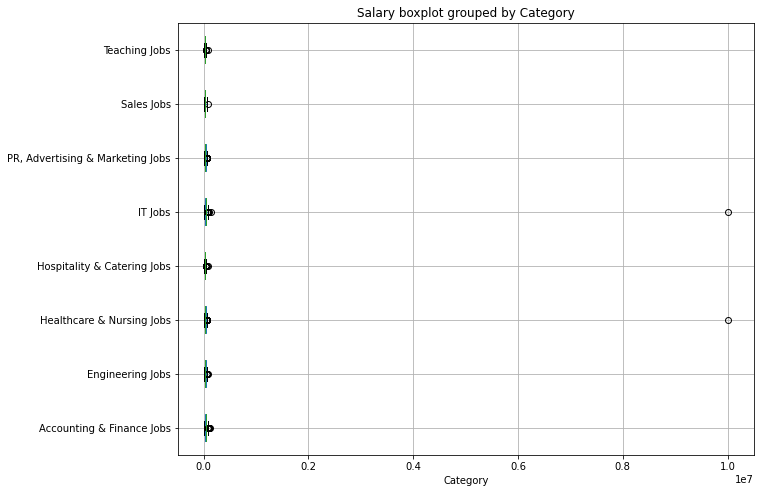

In [62]:
# Visualize the boxplot, showing outliers
fig, ax = plt.subplots(figsize=(10,8))
job_df.boxplot(column='Salary', by='Category', ax=ax, vert=False)
plt.title('Salary boxplot grouped by Category')
plt.suptitle('') 
plt.show()

Outliers shown in all categories. However there are two extremely different salary shown in `IT Jobs` & `Healthcare & Nursing`.

In boxplot\statistical method, data point outside $Q1-1.5*IQR$ or $Q3+ 1.5 * IQR$ will be regarded as outliers.


In [63]:
# define a function to find out non outliers range
def find_outlier_index(df, group, value):
    '''
    df:  DataFrame datatype
    group:  column needs to be grouped
    value:  calculated value based on group
    
    return: pandas series 
        
    '''
    Q1 = df[df['Category']==group][value].quantile(0.25)
    Q3 = df[df['Category']==group][value].quantile(0.75)
    IQR = Q3 - Q1
    
    filter_outlier = (df[df['Category']==group][value] < (Q1 - 1.5 * IQR)
                         ) | (df[df['Category']==group][value] > (Q3 + 1.5 * IQR))
    return filter_outlier

In [64]:
# this cell shows the identified all outliers
display(job_df[job_df['Category']=='Healthcare & Nursing Jobs'][find_outlier_index(job_df, 'Healthcare & Nursing Jobs', 'Salary')].head())
display(job_df[job_df['Category']=='IT Jobs'][find_outlier_index(job_df, 'IT Jobs', 'Salary')].head())

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
39,72293685,Senior Regulatory Labelling Manager Great Company,the city,Nonstop Pharma,non-specified,non-specified,Healthcare & Nursing Jobs,60000.0,20120801T000000,20120815T000000,gojobsearch.co.uk
229,71901084,Medical Manager – South East FMCG,slough,Paramount Recruitment,non-specified,non-specified,Healthcare & Nursing Jobs,57500.0,20121006T000000,20121205T000000,gojobsearch.co.uk
305,71224398,Senior Health Economics Manager,lancashire,G2 Healthcare Resourcing,non-specified,non-specified,Healthcare & Nursing Jobs,60000.0,20130625T150000,20130725T150000,gojobsearch.co.uk
558,67754056,Medical Affairs Manager OTC Top Global Company,uk,Nonstop Pharma,non-specified,non-specified,Healthcare & Nursing Jobs,60000.0,20130719T000000,20130802T000000,gojobsearch.co.uk
1021,68070778,Senior Biostatisticians Wanted Clinical CRO,uk,"Paramount Recruitment Med Comms, PR & Advertising",non-specified,permanent,Healthcare & Nursing Jobs,60000.0,20130130T000000,20130430T000000,totaljobs.com


,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
61,70099781,Acceptance into Service/ Assurance Lead (Trans...,the city,Interquest Group,non-specified,non-specified,IT Jobs,91200.0,20130429T120000,20130513T120000,gojobsearch.co.uk
98,70099850,Checkpoint Engineer,london,Orgtel,non-specified,non-specified,IT Jobs,90000.0,20131225T120000,20140108T120000,gojobsearch.co.uk
114,70099650,SAS Programmer HomeBased Contract,london,SEC Recruitment,non-specified,non-specified,IT Jobs,86400.0,20121119T000000,20130118T000000,gojobsearch.co.uk
130,69865990,Contract SAS Data Management Programmer,london,SEC Recruitment,non-specified,non-specified,IT Jobs,91200.0,20130625T120000,20130824T120000,gojobsearch.co.uk
142,69865814,technical designer,macclesfield,SEC Recruitment,non-specified,non-specified,IT Jobs,85200.0,20120809T000000,20121008T000000,gojobsearch.co.uk


In [65]:
# find top 5 values for IT jobs
job_df[job_df['Category']=='IT Jobs']['Salary'].nlargest(5)

31881    10000000.0
37031      150000.0
32717      100000.0
15932       91440.0
14431       91326.0
Name: Salary, dtype: float64

In [66]:
# find top 5 values for Healthcare & Nursing Jobs
job_df[job_df['Category']=='Healthcare & Nursing Jobs']['Salary'].nlargest(5)

30749    10000000.0
39          60000.0
305         60000.0
558         60000.0
1021        60000.0
Name: Salary, dtype: float64

It can be found some general highly paid jobs are identified as outliers, we choose not to change them because of lack of information. However, those two extremely high salary in `IT Jobs` & `Healthcare & Nursing` (shown in boxplot) are probablly a data input error. 

\\$10000000 in `IT Jobs` & `Healthcare & Nursing` will be changed to \\$200000, which still be highest salary in the group. All other idenfied outliers will not be changed, but they are still recorded into error list.



In [67]:
# find those two outliers needed to be changed
changing_outlier_list = job_df[job_df['Salary']>1000000]['Salary'].index.to_list()

In [68]:
# two outliers' index
changing_outlier_list

[30749, 31881]

In [69]:
# find all outliers based on boxplot
IT_outlier_idx = job_df[job_df['Category']=='IT Jobs'][find_outlier_index(
    job_df, 'IT Jobs', 'Salary')]['Salary'].index.to_list()

Healthcare_outlier_idx = job_df[job_df['Category']=='Healthcare & Nursing Jobs'][find_outlier_index(
    job_df, 'Healthcare & Nursing Jobs', 'Salary')]['Salary'].index.to_list()

Engineering_outlier_idx = job_df[job_df['Category']=='Engineering Jobs'][find_outlier_index(
    job_df, 'Engineering Jobs', 'Salary')]['Salary'].index.to_list()

Accounting_outlier_idx = job_df[job_df['Category']=='Accounting & Finance Jobs'][find_outlier_index(
    job_df, 'Accounting & Finance Jobs', 'Salary')]['Salary'].index.to_list()

Sales_outlier_idx = job_df[job_df['Category']=='Sales Jobs'][find_outlier_index(
    job_df, 'Sales Jobs', 'Salary')]['Salary'].index.to_list()

Hospitality_outlier_idx = job_df[job_df['Category']=='Hospitality & Catering Jobs'][find_outlier_index(
    job_df, 'Hospitality & Catering Jobs', 'Salary')]['Salary'].index.to_list()

Teaching_outlier_idx = job_df[job_df['Category']=='Teaching Jobs'][find_outlier_index(
    job_df, 'Teaching Jobs', 'Salary')]['Salary'].index.to_list()

PR_outlier_idx = job_df[job_df['Category']=='PR, Advertising & Marketing Jobs'][find_outlier_index(
    job_df, 'PR, Advertising & Marketing Jobs', 'Salary')]['Salary'].index.to_list()

all_outlier_idx = IT_outlier_idx+ Healthcare_outlier_idx+ Engineering_outlier_idx + \
                    Accounting_outlier_idx+Sales_outlier_idx+Hospitality_outlier_idx+\
                    Teaching_outlier_idx+PR_outlier_idx

In [70]:
# remove those two outliers from all outlier list, we have a new list called unchanged outlier list
unchange_outlier_list = [x for x in all_outlier_idx if x not in changing_outlier_list]

In [71]:
# record those unchanged outliers
error_outlier_unchange=[]

for idx in unchange_outlier_list:
    error_dict={}
    error_dict['indexOfdf']=idx
    error_dict['Id']=job_df.loc[idx, 'Id']
    error_dict['ColumnName']='Salary'
    error_dict['Original']=job_df.loc[idx, 'Salary']
    error_dict['Modified']=""
    error_dict['ErrorType']='Outliers'
    error_dict['Fixing']="No changing, because of no enough information"
    error_outlier_unchange.append(error_dict)
    
# record & update those two outliers
error_outlier_change= []
for idx in changing_outlier_list:
    error_dict={}
    error_dict['indexOfdf']=idx
    error_dict['Id']=job_df.loc[idx, 'Id']
    error_dict['ColumnName']='Salary'
    error_dict['Original']=job_df.loc[idx, 'Salary']
    error_dict['Modified']=float(100000)
    error_dict['ErrorType']='Outliers'
    error_dict['Fixing']="Changing outlier "+str(job_df.loc[idx, 'Salary'])+" to "+ str(float(100000))
    error_outlier_change.append(error_dict)
    job_df.loc[idx, 'Salary']=float(100000)
    

In `Salary` section, changes committed are:\
   Step1: Irregularties check, fix, record\
   Step2: Missing value prediction, fix, record\
   Step3: Outliers detection, handling, reocrd

In [72]:
error_list_salary= (error_salary_per_annum + error_salary_slash_year + error_salary_k + error_salary_hourly_a +
                    error_salary_hourly_b + error_list_range_cal_a + error_list_range_cal_b + error_salary_imputed_missing +
                    error_outlier_change + error_outlier_unchange)

###  OpenDate & CloseDate

In [73]:
# As far as we know, there is no NaN in these both column,  Check both length again
print(len(job_df['OpenDate']), len(job_df['CloseDate']))

50703 50703


In [74]:
# check NaN
print(job_df['OpenDate'].isna().sum(), job_df['CloseDate'].isna().sum())

0 0


In [75]:
# Inspect what does date looks like
job_df[['OpenDate', 'CloseDate']].head()

,OpenDate,CloseDate
0,20120724T000000,20120823T000000
1,20130108T150000,20130207T150000
2,20130613T120000,20130812T120000
3,20120804T000000,20120903T000000
4,20120904T150000,20120918T150000


In [76]:
# Check if any  invalid date in column
for idx, date in job_df[job_df['OpenDate'].str.match(r'\d+T\d+')]['OpenDate'].items():
    try:
        datetime.strptime(date, '%Y%m%dT%H%M%S')
    except ValueError:
        print('Index',idx, "is not a valid date", date)

Index 47680 is not a valid date 20131301T120000


In [77]:
# have a look at its close date
job_df.loc[47680,]

Id                                               67106342
Title           Account Manager  Mobile Phones  B2B  Kent
Location                                south east london
Company                                     non-specified
ContractType                                non-specified
ContractTime                                    permanent
Category                                       Sales Jobs
Salary                                            35000.0
OpenDate                                  20131301T120000
CloseDate                                 20130314T120000
SourceName                          simplysalesjobs.co.uk
Name: 47680, dtype: object

Just one invalid date found, fix it first and record it, the close date is 03-14, therefore, 13 might be 03 which is reasonable

In [78]:
# Lets update it to March
job_df.loc[47680,'OpenDate'] = '20130301T120000'

# Create a error list for this updating
error_list_impossible_date=[
    {'indexOfdf':'47680',
     'Id':job_df.loc[47680,'OpenDate'],
     'ColumnName':'OpenDate',
     'Original':'20131301T120000',
     'Modified':'20130301T120000',
     'ErrorType':'Impossible value',
     'Fixing':'Change 13 to 03'
    }
]

After solved this invalid date, we use to_datetime to change them into datetime datatype directly

In [79]:
job_df['OpenDate']=pd.to_datetime(job_df['OpenDate'], format='%Y%m%dT%H%M%S')
job_df['CloseDate']=pd.to_datetime(job_df['CloseDate'], format='%Y%m%dT%H%M%S')

In [80]:
# record the format change for all rows in OpenDate & CloseDate 
error_list_all_date=[
    {'indexOfdf':'ALL',
     'Id':'ALL',
     'ColumnName':'OpenDate,CloseDate',
     'Original':'ALL',
     'Modified':'ALL',
     'ErrorType':'Format Changing',
     'Fixing':'Change dateformt to required datetime object'
    }
]

Once we have datetime object saved in column, we can do comparison to check whether there is any **Integrity Constraint Violation** issue

In [81]:
# check the violated date
violated_idx=[]
for date_idx in range(0,job_df['OpenDate'].shape[0]):
    if job_df['OpenDate'][date_idx] > job_df['CloseDate'][date_idx]:
        violated_idx.append(date_idx)
        
job_df.loc[violated_idx,:]

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
7815,68095909,French and/or Germanspeaking Marketing Executive,berkshire,Euro London Appointments London,non-specified,permanent,"PR, Advertising & Marketing Jobs",25500.0,2012-08-19 00:00:00,2012-06-20 00:00:00,totaljobs.com
16538,70763823,Senior Theatre Anaesthetics / Recovery,surrey,STR Limited,non-specified,permanent,Healthcare & Nursing Jobs,31000.0,2013-08-08 12:00:00,2013-06-09 12:00:00,cv-library.co.uk
30830,71614583,RGN **** Welcome Bonus Truro,truro,Compass Associates Ltd,full_time,non-specified,Healthcare & Nursing Jobs,22500.0,2013-12-13 00:00:00,2013-11-13 00:00:00,staffnurse.com
35536,68627214,Java Developer Front Office Risk ****K,central london,ThomsonKeene,non-specified,permanent,IT Jobs,85000.0,2013-08-13 12:00:00,2013-07-14 12:00:00,jobserve.com
39601,54431945,Pastry Sous Chef Top Hotel High Volume Pastr...,hertfordshire,Chef Results,non-specified,non-specified,Hospitality & Catering Jobs,27000.0,2013-12-28 15:00:00,2013-11-28 15:00:00,jobs.catererandhotelkeeper.com


From above, we can find the opendate is later than closedate, we could simply swap them, which is more reasonable

In [82]:
# swap those violated index & record error list
error_list_swap_date=[]
for idx in violated_idx:
    error_dict_1 = {}
    error_dict_2 = {}
    open_date = job_df.loc[idx, 'OpenDate']
    close_date = job_df.loc[idx, 'CloseDate']
    job_df.loc[idx, 'OpenDate'] = close_date
    
    error_dict_1['indexOfdf']=idx
    error_dict_1['Id']=job_df.loc[idx, 'Id']
    error_dict_1['ColumnName']='OpenDate'
    error_dict_1['Original']=open_date
    error_dict_1['Modified']=close_date
    error_dict_1['ErrorType']='Integrity Constraint Violation'
    error_dict_1['Fixing']="Swap " + "'"+str(open_date)+"'" + " with " + "'"+ str(close_date) +"'"
    
    job_df.loc[idx, 'CloseDate'] = open_date
    error_dict_2['indexOfdf']=idx
    error_dict_2['Id']=job_df.loc[idx, 'Id']
    error_dict_2['ColumnName']='CloseDate'
    error_dict_2['Original']=close_date
    error_dict_2['Modified']=open_date
    error_dict_2['ErrorType']='Integrity Constraint Violation'
    error_dict_2['Fixing']="Swap " + "'"+str(close_date)+"'" + " with " + "'"+ str(open_date) +"'"

    error_list_swap_date.append(error_dict_1)
    error_list_swap_date.append(error_dict_2)


In this `OpenDate&CloseDate` section, one impossible date, a few Integrity Constraint Violation issues are found

In [83]:
error_list_date =  error_list_impossible_date + error_list_swap_date + error_list_all_date

### Combine all error list & Check final Dataset

In [84]:
error_list = (error_list_company + error_list_location + 
              error_list_contracttype + error_list_contracttime + error_list_salary + error_list_date)

In [85]:
error_df = pd.DataFrame(error_list)

In [86]:
error_df.head()

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
0,33202,71764176,Company,NaN,non-specified,Missing Value,Change nan to non-specified
1,33231,66049382,Company,NaN,non-specified,Missing Value,Change nan to non-specified
2,33250,69960879,Company,NaN,non-specified,Missing Value,Change nan to non-specified
3,33278,68237526,Company,NaN,non-specified,Missing Value,Change nan to non-specified
4,33425,69554124,Company,NaN,non-specified,Missing Value,Change nan to non-specified


In [87]:
job_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50703 entries, 0 to 50702
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            50703 non-null  int32         
 1   Title         50703 non-null  object        
 2   Location      50703 non-null  object        
 3   Company       50703 non-null  object        
 4   ContractType  50703 non-null  object        
 5   ContractTime  50703 non-null  object        
 6   Category      50703 non-null  object        
 7   Salary        50703 non-null  float64       
 8   OpenDate      50703 non-null  datetime64[ns]
 9   CloseDate     50703 non-null  datetime64[ns]
 10  SourceName    50703 non-null  object        
dtypes: datetime64[ns](2), float64(1), int32(1), object(7)
memory usage: 4.1+ MB


## Saving data
Save the parsed and cleaned data as well as the error list, named as:
- \<student\_id\>_dataset1_solution.csv
- \<student\_id\>_errorlist.csv

In [88]:
# code to save output data
job_df.to_csv('S3880497_dataset1_solution.csv', index=False)
error_df.to_csv('S3880497_errorlist.csv', index=False)

## Summary
Give a short summary and anything you would like to talk about the assessment here.

In this Assignment, the most interesting experience is building a completed pipeline to pre-processing XML\Text data.

* Better understanding the Tree-Structure for XML file will be very helpful to parse them easily. Therefore, generally examining the xml file struture before starting coding is very important.
* Cleanining each column free from errors is a good way to avoid missing
* There is no perfect way to impute missing value, although imputed missing value still can give some information
* Outliers also can give information, anomaly detection is one of application. Therefore, simply removing is not a good way. In my assignment, I choose to keep those reasonable, and scale those significant outliers to a reasonable value. 
* Writing Functions can apply task on different scenarios quickly, and also it can help me to better understand the general idea from different tasks.


Overall, the Part1 & Part2 of this assignment show a completed Data Parsing, Cleaning Pipeline, which can be easily applied on similar task.

